In [29]:
#import libraries
import os
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import joblib

%matplotlib inline

import pandas_profiling


from scipy.stats import skew, norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, classification_report, accuracy_score
from math import sqrt

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



from lightgbm import LGBMRegressor
import lightgbm as lgb

np.random.seed(0)

In [30]:
#import data
current_path = os.getcwd()
current_path = os.path.dirname(current_path)
print(current_path)
#C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone\data_mart
dataset = current_path + '//data_mart//reporting_wr.csv'
cities = current_path + '//data_mart//facts_cities_metrics.csv'
college = current_path + '//data_mart//facts_college_metrics.csv'

dimc_file = current_path + '//data_mart//dimensions_cities.csv'
dimco_file = current_path + '//data_mart//dimensions_colleges.csv'
dimp_file = current_path + '//data_mart//dimensions_players.csv'




print(dataset)
city_dim = pd.read_csv(dimc_file)
college_dim = pd.read_csv(dimco_file)
player_dim = pd.read_csv(dimp_file)

dataset = pd.read_csv(dataset)
college_df = pd.read_csv(college)
city_df = pd.read_csv(cities)


#https://stackoverflow.com/questions/9856683/using-pythons-os-path-how-do-i-go-up-one-directory

C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone
C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone//data_mart//reporting_wr.csv


In [31]:
for x in dataset.columns:
    print(x)
    #print(dataset[x].describe)
    #print('-----')

fms_id
espn_id
full_name
first_name
last_name
position
position_group
section
college
draft_year
selection_number
position_rank
position_group_rank
section_rank
drafting_team
home_city
home_state
home_country
college_weight_pounds
college_height_inches
hw_ratio
forty
vertical
bench
broad
threecone
shuttle
receiving_games
receiving_rec_td
receiving_rec_yards
receiving_receptions
receiving_scrim_plays
receiving_rec_td_pg
receiving_rec_yards_pg
receiving_receptions_pg
receiving_scrim_plays_pg
receiving_rec_td_pg_cf_scaled
receiving_rec_yards_pg_cf_scaled
receiving_receptions_pg_cf_scaled
receiving_scrim_plays_pg_cf_scaled
wr_college_weight_pounds_zscore
wr_college_height_inches_zscore
wr_hw_ratio_zscore
wr_forty_zscore
wr_vertical_zscore
wr_bench_zscore
wr_broad_zscore
wr_threecone_zscore
wr_shuttle_zscore
wr_receiving_rec_td_zscore
wr_receiving_rec_yards_zscore
wr_receiving_receptions_zscore
wr_receiving_scrim_plays_zscore
wr_receiving_rec_td_pg_zscore
wr_receiving_rec_yards_pg_zscore
wr

In [32]:
#determine which columns have None values
none_columns = []
for x in dataset.columns:
    if dataset[x].isnull().values.any() == True:
        none_columns.append(x)
print(none_columns)

['espn_id', 'selection_number', 'position_rank', 'position_group_rank', 'section_rank', 'drafting_team', 'home_city', 'home_state', 'home_country', 'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle', 'receiving_rec_td_pg', 'receiving_rec_yards_pg', 'receiving_receptions_pg', 'receiving_scrim_plays_pg', 'receiving_rec_td_pg_cf_scaled', 'receiving_rec_yards_pg_cf_scaled', 'receiving_receptions_pg_cf_scaled', 'receiving_scrim_plays_pg_cf_scaled', 'wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore', 'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore', 'wr_receiving_rec_td_pg_zscore', 'wr_receiving_rec_yards_pg_zscore', 'wr_receiving_receptions_pg_zscore', 'wr_receiving_scrim_plays_pg_zscore', 'wr_football_spending_zscore', 'wr_coaches_salaries_zscore', 'wr_ticket_sales_zscore', 'wr_receiving_rec_td_pg_cf_scaled_zscore', 'wr_receiving_rec_yards_pg_cf_scaled_zscore', 'wr_receiving_receptions_pg_cf_scaled_zscore', 'wr_receiving_scrim_plays_pg_cf_scaled_zscore', 'wr

In [33]:
#Deal with None Values
none_dict = {'espn_id': 0, 
    'conference':  'non_power_five',
    'selection_number': 400,
    'position_rank': 400,
    'position_group_rank': 400,
    'section_rank': 400,
    'drafting_team': 'No Team',
    'home_city': 'No City',
    'home_state': 'No State',
    'home_country': 'USA',
    'forty': dataset['forty'].mean(),
    'vertical': dataset['vertical'].mean(), 
    'bench': dataset['bench'].mean(), 
    'broad': dataset['broad'].mean(),
    'threecone': dataset['threecone'].mean(),
    'shuttle': dataset['shuttle'].mean(),
             
    'receiving_rec_td_pg': dataset['receiving_rec_td_pg'].mean(), 
    'receiving_rec_yards_pg': dataset['receiving_rec_yards_pg'].mean(), 
    'receiving_receptions_pg': dataset['receiving_receptions_pg'].mean(), 
    'receiving_scrim_plays_pg': dataset['receiving_scrim_plays_pg'].mean(), 
    'receiving_rec_td_pg_cf_scaled': dataset['receiving_rec_td_pg_cf_scaled'].mean(), 
    'receiving_rec_yards_pg_cf_scaled': dataset['receiving_rec_yards_pg_cf_scaled'].mean(), 
    'receiving_receptions_pg_cf_scaled': dataset['receiving_receptions_pg_cf_scaled'].mean(), 
    'receiving_scrim_plays_pg_cf_scaled': dataset['receiving_scrim_plays_pg_cf_scaled'].mean(),
             
    
             
             
             
    'wr_football_spending_zscore': dataset['wr_football_spending_zscore'].mean(), 
    'wr_coaches_salaries_zscore': dataset['wr_coaches_salaries_zscore'].mean(), 
    'wr_ticket_sales_zscore': dataset['wr_ticket_sales_zscore'].mean(), 
#'wr_poverty_pct_zscore': dataset['wr_poverty_pct_zscore'].mean(), 
#'wr_med_income_zscore': dataset['wr_med_income_zscore'].mean(),
    'max_madden': dataset['max_madden'].min() - 10,
    'wr_forty_zscore': 0, 
    'wr_vertical_zscore': 0, 
    'wr_bench_zscore': 0, 
    'wr_broad_zscore': 0, 
    'wr_threecone_zscore': 0, 
    'wr_shuttle_zscore': 0, 
    
    'wr_max_madden_zscore': dataset['wr_max_madden_zscore'].min() - 0.1,
    'wr_receiving_rec_td_pg_zscore': 0, 
    'wr_receiving_rec_yards_pg_zscore': 0, 
    'wr_receiving_receptions_pg_zscore': 0, 
    'wr_receiving_rush_att_pg_zscore': 0, 
    'wr_receiving_rush_td_pg_zscore': 0, 
    'wr_receiving_rush_yds_pg_zscore': 0, 
    'wr_receiving_scrim_plays_pg_zscore': 0, 
    'wr_receiving_scrim_tds_pg_zscore': 0, 
    'wr_receiving_scrim_yds_pg_zscore': 0,
             
    'wr_receiving_rec_td_pg_cf_scaled_zscore': 0, 
    'wr_receiving_rec_yards_pg_cf_scaled_zscore': 0, 
             
             
             
    'wr_receiving_receptions_pg_cf_scaled_zscore':  0, 
    'wr_receiving_scrim_plays_pg_cf_scaled_zscore':  0,
             
    'wr_receiving_scrim_plays_pg_cf_scaled_zscore': 0, 
    'wr_receiving_scrim_tds_pg_cf_scaled_zscore': 0,
    'wr_receiving_scrim_yds_pg_cf_scaled_zscore': 0,
             
#wr_receiving_rec_td_pg_cf_scaled_zscore
#wr_receiving_rec_td_pg_cf_scaled_zscore
#wr_receiving_rec_td_pg_cf_scaled_zscore
    
    'wr_football_spending_zscore': 0, 
    'wr_coaches_salaries_zscore':  0, 
    'wr_ticket_sales_zscore':  0}

print(none_dict)

for none_col in none_columns:
    dataset[none_col] = dataset[none_col].fillna(none_dict[none_col])
   

#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

{'espn_id': 0, 'conference': 'non_power_five', 'selection_number': 400, 'position_rank': 400, 'position_group_rank': 400, 'section_rank': 400, 'drafting_team': 'No Team', 'home_city': 'No City', 'home_state': 'No State', 'home_country': 'USA', 'forty': 4.511931385006354, 'vertical': 35.26238390092879, 'bench': 14.531806615776082, 'broad': 120.43402225755167, 'threecone': 6.97023622047244, 'shuttle': 4.220076628352491, 'receiving_rec_td_pg': 0.4400588148503304, 'receiving_rec_yards_pg': 55.90988487325946, 'receiving_receptions_pg': 3.7957006276847367, 'receiving_scrim_plays_pg': 4.090111085899776, 'receiving_rec_td_pg_cf_scaled': 0.38059213418186644, 'receiving_rec_yards_pg_cf_scaled': 48.39134726819287, 'receiving_receptions_pg_cf_scaled': 3.2830917852521404, 'receiving_scrim_plays_pg_cf_scaled': 3.5376432724018416, 'wr_football_spending_zscore': 0, 'wr_coaches_salaries_zscore': 0, 'wr_ticket_sales_zscore': 0, 'max_madden': 42.0, 'wr_forty_zscore': 0, 'wr_vertical_zscore': 0, 'wr_bench

In [34]:
#create categories for Madden Scores
def f(row):
    if row['max_madden'] >= 90 : val = 90
    elif row['max_madden'] < 90 and row['max_madden'] >= 80 : val = 80
    elif row['max_madden'] < 80 and row['max_madden'] >= 70 : val = 70  
    elif row['max_madden'] < 70 and row['max_madden'] >= 60 : val = 60
    elif row['max_madden'] < 60 and row['max_madden'] >= 50 : val = 50
    elif row['max_madden'] < 50 and row['max_madden'] >= 40 : val = 40
    else: val = 40
    return val
dataset['madden_cat'] = dataset.apply(f, axis=1)





"""

def f_avg_min(row):
    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12
    return avg_min

def f_avg_max(row):
    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12
    return avg_max

dataset['avg_min'] = dataset.apply(f_avg_min, axis=1)


dataset['avg_max'] = dataset.apply(f_avg_max, axis=1)
"""





"\n\ndef f_avg_min(row):\n    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12\n    return avg_min\n\ndef f_avg_max(row):\n    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12\n    return avg_max\n\ndataset['avg_min'] = dataset.apply(f_avg_min, axis=1)\n\n\ndataset['avg_max'] = dataset.apply(f_avg_max, axis=1)\n"

In [35]:
####REMOVE ALL NO MADDEN SCORES thru 2016 and keep all NO MADDEN SCORES 2015 forward
#determine % of no madden scores wanted
no_madden_percentage = .25

no_madden_df = dataset.loc[dataset['madden_cat'] == 40]
madden_df = dataset.loc[dataset['madden_cat'] != 40]

print(no_madden_df.shape)
print(madden_df.shape)

current_no_madden_percentage = no_madden_df.shape[0] / dataset.shape[0] - no_madden_percentage
print(current_no_madden_percentage)

for x in set(dataset['draft_year'].values):
    if x in [2017, 2018, 2019]:
        year_df = no_madden_df.loc[dataset['draft_year'] == x]
        madden_df = madden_df.append(year_df)


dataset = madden_df
print(dataset.shape)
dataset.head()
dataset = shuffle(dataset)
dataset.head()

#https://stackoverflow.com/questions/28556942/pandas-remove-rows-at-random-without-shuffling-dataset

(340, 93)
(471, 93)
0.16923551171393342
(505, 93)


,fms_id,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,...,wr_max_oct_zscore,wr_max_nov_zscore,wr_max_dec_zscore,wr_receiving_rec_td_pg_cf_scaled_zscore,wr_receiving_rec_yards_pg_cf_scaled_zscore,wr_receiving_receptions_pg_cf_scaled_zscore,wr_receiving_scrim_plays_pg_cf_scaled_zscore,wr_max_madden_zscore,max_madden,madden_cat
121,3786,0.0,Noah Brown,Noah,Brown,WR,WR,O,Ohio State,2017,...,-0.585665,-0.636419,-0.760170,0.493997,-1.203667,-0.880761,-0.934487,-0.390256,70.0,70
131,4590,0.0,Taywan Taylor,Taywan,Taylor,WR,WR,O,Western Kentucky,2017,...,0.283559,0.155443,-0.064450,1.012022,0.639033,0.218466,0.152158,0.460718,78.0,70
105,2218,0.0,James Quick,James,Quick,WR,WR,O,Louisville,2017,...,-0.371508,-0.428555,-0.465512,-0.383418,-0.222302,-0.436444,-0.536113,-2.404948,42.0,40
420,4479,0.0,Stephen Williams,Stephen,Williams,WR,WR,O,Toledo,2010,...,-1.064368,-1.042249,-1.046643,-0.319328,-0.069688,0.170186,-0.028588,-0.922115,65.0,60
516,783,0.0,Chansi Stuckey,Chansi,Stuckey,WR,WR,O,Clemson,2007,...,0.132390,0.294019,0.238393,-1.123972,-0.393773,0.047575,0.712862,-0.602999,68.0,60


In [36]:
dataset.columns[20:]

Index(['hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_scrim_plays', 'receiving_rec_td_pg',
       'receiving_rec_yards_pg', 'receiving_receptions_pg',
       'receiving_scrim_plays_pg', 'receiving_rec_td_pg_cf_scaled',
       'receiving_rec_yards_pg_cf_scaled', 'receiving_receptions_pg_cf_scaled',
       'receiving_scrim_plays_pg_cf_scaled', 'wr_college_weight_pounds_zscore',
       'wr_college_height_inches_zscore', 'wr_hw_ratio_zscore',
       'wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore',
       'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore',
       'wr_receiving_rec_td_zscore', 'wr_receiving_rec_yards_zscore',
       'wr_receiving_receptions_zscore', 'wr_receiving_scrim_plays_zscore',
       'wr_receiving_rec_td_pg_zscore', 'wr_receiving_rec_yards_pg_zscore',
       'wr_receiving_receptions_pg_zscore',
       'wr_rece

In [37]:

#Total Features
"""['espn_id', 'fms_college_id', 'fms_city_id', 'full_name',
       'first_name', 'last_name', 'position', 'position_group', 'section',
       'college', 'conference', 'draft_year', 'selection_number',
       'position_rank', 'position_group_rank', 'section_rank', 'drafting_team',
       'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_scrim_plays', 'receiving_rec_td_pg',
       'receiving_rec_yards_pg', 'receiving_receptions_pg',
       'receiving_scrim_plays_pg', 'receiving_rec_td_pg_cf_scaled',
       'receiving_rec_yards_pg_cf_scaled', 'receiving_receptions_pg_cf_scaled',
       'receiving_scrim_plays_pg_cf_scaled', 'wr_college_weight_pounds_zscore',
       'wr_college_height_inches_zscore', 'wr_hw_ratio_zscore',
       'wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore',
       'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore',
       'wr_receiving_rec_td_zscore', 'wr_receiving_rec_yards_zscore',
       'wr_receiving_receptions_zscore', 'wr_receiving_scrim_plays_zscore',
       'wr_receiving_rec_td_pg_zscore', 'wr_receiving_rec_yards_pg_zscore',
       'wr_receiving_receptions_pg_zscore',
       'wr_receiving_scrim_plays_pg_zscore', 'wr_football_spending_zscore',
       'wr_coaches_salaries_zscore', 'wr_ticket_sales_zscore',
       'wr_ann_rain_inch_zscore', 'wr_ann_snow_inch_zscore',
       'wr_min_jan_zscore', 'wr_min_feb_zscore', 'wr_min_mar_zscore',
       'wr_min_apr_zscore', 'wr_min_may_zscore', 'wr_min_jun_zscore',
       'wr_min_jul_zscore', 'wr_min_aug_zscore', 'wr_min_sep_zscore',
       'wr_min_oct_zscore', 'wr_min_nov_zscore', 'wr_min_dec_zscore',
       'wr_max_jan_zscore', 'wr_max_feb_zscore', 'wr_max_mar_zscore',
       'wr_max_apr_zscore', 'wr_max_may_zscore', 'wr_max_jun_zscore',
       'wr_max_jul_zscore', 'wr_max_aug_zscore', 'wr_max_sep_zscore',
       'wr_max_oct_zscore', 'wr_max_nov_zscore', 'wr_max_dec_zscore',
       'wr_receiving_rec_td_pg_cf_scaled_zscore',
       'wr_receiving_rec_yards_pg_cf_scaled_zscore',
       'wr_receiving_receptions_pg_cf_scaled_zscore',
       'wr_receiving_scrim_plays_pg_cf_scaled_zscore', 'wr_max_madden_zscore',
       'max_madden', 'madden_cat']"""





# 'college_weight_pounds', 'college_height_inches'


features = ['college_weight_pounds', 'college_height_inches', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_rush_att', 'receiving_rush_td',
       'receiving_rush_yds', 'receiving_scrim_plays', 'receiving_scrim_tds',
       'receiving_scrim_yds', 'receiving_seasons', 'ann_rain_inch', 'ann_snow_inch',
       'min_jan', 'min_feb',
       'min_mar', 'min_apr', 'min_may', 'min_jun', 'min_jul', 'min_aug',
       'min_sep', 'min_oct', 'min_nov', 'min_dec', 'max_jan', 'max_feb',
       'max_mar', 'max_apr', 'max_may', 'max_jun', 'max_jul', 'max_aug',
       'max_sep', 'max_oct', 'max_nov', 'max_dec']

z_features = ['wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore',
       'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore',
       'wr_receiving_rec_td_pg_cf_scaled_zscore',
       'wr_college_weight_pounds_zscore', 'wr_college_height_inches_zscore',
       'wr_receiving_rec_yards_pg_cf_scaled_zscore',
       'wr_ann_rain_inch_zscore', 
       'wr_receiving_receptions_pg_cf_scaled_zscore', 
       'wr_receiving_scrim_plays_pg_cf_scaled_zscore']



"""
z_features = ['wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore',
       'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore',
       'wr_receiving_rec_td_pg_cf_scaled_zscore',
       'wr_hw_ratio_zscore',
       'wr_receiving_rec_yards_pg_cf_scaled_zscore',
       'wr_ann_rain_inch_zscore',
       'wr_receiving_receptions_pg_cf_scaled_zscore', 
       'wr_threecone_zscore',
       'wr_receiving_scrim_plays_pg_cf_scaled_zscore',
       'wr_college_height_inches_zscore' ]
       
       
       
       'wr_bench_zscore',
'wr_forty_zscore',
'wr_hw_ratio_zscore',
'wr_receiving_scrim_plays_zscore',
'wr_receiving_rec_yards_pg_cf_scaled_zscore',
'wr_receiving_rec_td_zscore',
'wr_shuttle_zscore',
'wr_vertical_zscore',
'wr_receiving_scrim_plays_pg_cf_scaled_zscore',
'wr_receiving_receptions_pg_cf_scaled_zscore',
'wr_ann_rain_inch_zscore',
'wr_threecone_zscore',
'wr_ticket_sales_zscore',
'wr_broad_zscore'


"""


"\nz_features = ['wr_forty_zscore', 'wr_vertical_zscore', 'wr_bench_zscore',\n       'wr_broad_zscore', 'wr_threecone_zscore', 'wr_shuttle_zscore',\n       'wr_receiving_rec_td_pg_cf_scaled_zscore',\n       'wr_hw_ratio_zscore',\n       'wr_receiving_rec_yards_pg_cf_scaled_zscore',\n       'wr_ann_rain_inch_zscore',\n       'wr_receiving_receptions_pg_cf_scaled_zscore', \n       'wr_threecone_zscore',\n       'wr_receiving_scrim_plays_pg_cf_scaled_zscore',\n       'wr_college_height_inches_zscore' ]\n       \n       \n       \n       'wr_bench_zscore',\n'wr_forty_zscore',\n'wr_hw_ratio_zscore',\n'wr_receiving_scrim_plays_zscore',\n'wr_receiving_rec_yards_pg_cf_scaled_zscore',\n'wr_receiving_rec_td_zscore',\n'wr_shuttle_zscore',\n'wr_vertical_zscore',\n'wr_receiving_scrim_plays_pg_cf_scaled_zscore',\n'wr_receiving_receptions_pg_cf_scaled_zscore',\n'wr_ann_rain_inch_zscore',\n'wr_threecone_zscore',\n'wr_ticket_sales_zscore',\n'wr_broad_zscore'\n\n\n"

#Create by game by conference per game stats
def game_avg(row):
    stats_list = ['rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td', 'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds']
    if row['rushing_games'] == 0:
        pass
    else:
        for stat in stats_list:
            
#{'acc', 'big_10', 'big_12', 'mountain_west', 'non_power_five', 'pac_12', 'sec'}
            if   row['conference'] == 'sec':  row[stat] = row[stat]/row['rushing_games'] * 1
            elif row['conference'] == 'acc':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_10':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'pac_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'mountain_west':  row[stat] = row[stat]/row['rushing_games'] * .75
            elif row['conference'] == 'non_power_five':  row[stat] = row[stat]/row['rushing_games'] * .6
        
            
            
    return row


#use by game stats?
game_averages = 'Y'
if game_averages == 'Y':
    dataset = dataset.apply(game_avg, axis=1)
else: pass

df_list = []
mean_list = []
std_list = []
col_list = []
for col in dataset[features].columns:
    col_list.append(col)
    mean_list.append(dataset[col].mean())
    std_list.append(dataset[col].std())
df_list.append(mean_list)
df_list.append(std_list)

df_mean_std = pd.DataFrame(df_list, columns=col_list, index = ['mean', 'std'])
df_mean_std.to_csv('rb_mean_std_features.csv')

In [38]:
#select year to hold out
holdout_year = 2015
#pick features from above
features_list = z_features




#z_score features
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden'].values)

#for col in dataset[features_list].columns:
#    dataset[col] = stats.zscore(dataset[col].values)



#prediction feature
#prediction_feature = 'max_madden'
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden_zscore'].values)
#max_mean = dataset['max_madden'].mean()
#max_std = dataset['max_madden'].std()
#prediction_feature = 'max_madden'

prediction_feature = 'max_madden'
features_list.append(prediction_feature)






#create a train and test df based on the hold out year
test_basis = 'hold_out'
if test_basis == 'hold_out':
    test_df = dataset.loc[dataset['draft_year'] == holdout_year]
    train_df = dataset.loc[dataset['draft_year'] != holdout_year]

if test_basis != 'hold_out':
    dataset = shuffle(dataset)
    split= .9
    train_df = dataset[:int(dataset.shape[0]*split)]
    test_df = dataset[int(dataset.shape[0]*split):]


#shuffle the dataset
test_df = shuffle(test_df)
train_df = shuffle(train_df)

#create a copy of the dataset with that feature set
test_df_feat = test_df[features_list].copy()
train_df_feat = train_df[features_list].copy()

In [39]:
   # Plot feature importance
def plot_feat_import(coef, model_title):
    feature_coef = pd.Series(index=X_train.columns, data=coef)
    print('{} model picked {} out of {} features'.format(model_title, str(sum(feature_coef != 0)), str(X_train.shape[1])))
    top_bottom_10 = pd.concat([feature_coef.sort_values().head(10), feature_coef.sort_values().tail(10)])
    #top_bottom_10 = feature_coef.sort_values()
    top_bottom_10.plot(kind='barh', title='Feature importance (Top and bottom 10) - {} model'.format(model_title))
    #from W207 project (Fleishman, Hilton, Niu)
    
def print_results(true_val, predict_val):
    print('Accuracy:  ' + str(accuracy_score(true_val, predict_val)))
    print('R2 : ' + str(r2_score(true_val, predict_val)))
    print('MSE : ' + str(mean_squared_error(true_val, predict_val)))
    

def plot_confusion(mat, model):
    
    array = mat
    df_cm = pd.DataFrame(array, index = [i for i in class_names],
                      columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    plt.title(model)
    sn.heatmap(df_cm, annot=True, cmap="Blues")
    
    
def f_rs(val):
    if val >= 90 : val = 90
    elif val < 90 and val >= 80 : val = 80
    elif val < 80 and val >= 70 : val = 70  
    elif val < 70 and val >= 60 : val = 60
    elif val < 60 and val >= 50 : val = 50
    elif val < 50 and val >= 40 : val = 40
    else: val = 40
    return val

def madden_predict_bins(predictions):
    results_test = []
    for x in predictions:        
        results_test.append(f_rs(x))
    return results_test


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    
    
class_names = sorted(list(set(dataset[prediction_feature].values)))

In [40]:
X_train, Y_train = train_df_feat[:].drop([prediction_feature], axis =1), train_df_feat.pop(prediction_feature)
X_validation, Y_validation = test_df_feat[:].drop([prediction_feature], axis =1), test_df_feat.pop(prediction_feature)
class_names = sorted(list(set(dataset[prediction_feature].values)))
class_names = sorted(list(set(madden_predict_bins(class_names))))

In [41]:
sorted(list(set(dataset[prediction_feature].values)))

[42.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 98.0,
 99.0]

In [42]:
result_df = test_df[['full_name', prediction_feature, 'madden_cat', 'position_group_rank']].copy()
print(result_df)
def result_df_viz(df, predictions, model_name):
    
    df[model_name] = predictions
    
    return df

                full_name  max_madden  madden_cat  position_group_rank
182      Breshad Perriman        75.0          70                  5.0
181        Antwan Goodley        68.0          60                 26.0
200       Jamison Crowder        84.0          80                 15.0
190             Deon Long        66.0          60                 32.0
216         Ty Montgomery        71.0          70                 14.0
214           Titus Davis        68.0          60                 39.0
205            Kenny Bell        66.0          60                 21.0
188       DeAndre Smelter        67.0          60                 30.0
203           Kaelin Clay        62.0          60                 22.0
187       DaVaris Daniels        64.0          60                 29.0
212         Sammie Coates        75.0          70                 13.0
207          Mario Alford        62.0          60                 25.0
189        DeAndrew White        66.0          60                 31.0
202   

Accuracy:  0.5833333333333334
R2 : 0.14960629921259827
MSE : 66.66666666666667
ElasticNetCV model picked 12 out of 13 features
Index(['position_group_rank', 'ElasticNetCV', 'ElasticNetCV Bins'], dtype='object')






































,full_name,ElasticNetCV,ElasticNetCV Bins,max_madden,madden_cat,position_group_rank
180,Amari Cooper,84.989288,80,93.0,90,1.0
206,Kevin White,83.144040,80,78.0,70,2.0
217,Tyler Lockett,77.209203,70,88.0,80,10.0
192,DeVante Parker,75.966657,70,84.0,80,3.0
213,Stefon Diggs,75.260692,70,93.0,90,19.0
199,Jaelen Strong,75.178852,70,73.0,70,11.0
212,Sammie Coates,74.854478,70,75.0,70,13.0
218,Vince Mayle,74.752636,70,70.0,70,17.0
207,Mario Alford,74.336810,70,62.0,60,25.0
209,Phillip Dorsett,74.300909,70,77.0,70,6.0


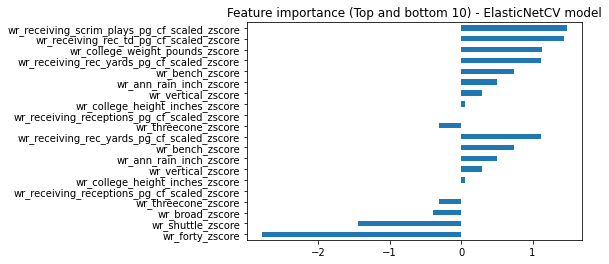

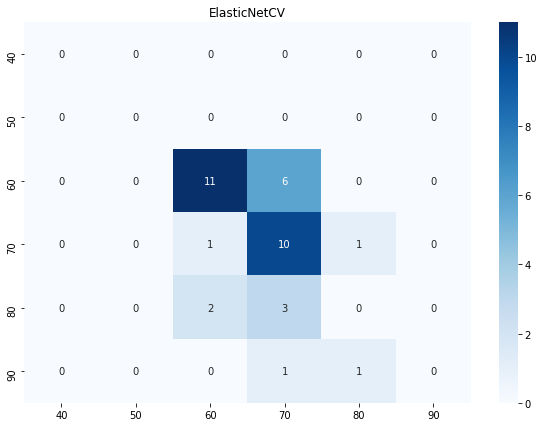

In [43]:
#ElasticNetCV:

elasticnetcv_model = ElasticNetCV(cv=5, random_state=0, l1_ratio=.7).fit(X_train, Y_train)
madden_predict = elasticnetcv_model.predict(X_validation)
#madden_predict = np.around(madden_predict, decimals = 0)



madden_predict_bin = np.array(madden_predict_bins(madden_predict))
Y_validation_bin = np.array(madden_predict_bins(Y_validation))
print_results(Y_validation_bin, madden_predict_bin)


mat = confusion_matrix(Y_validation_bin, madden_predict_bin, labels = class_names)
plot_feat_import(elasticnetcv_model.coef_, 'ElasticNetCV')

plot_confusion(mat, 'ElasticNetCV')
result_df_viz(result_df, madden_predict, 'ElasticNetCV')
result_df_viz(result_df, madden_predict_bin, 'ElasticNetCV Bins')
from scipy.stats import rankdata
print(result_df.columns[3:])
rank_df = result_df[result_df.columns[3:]]

def rank(row):
    print()
    return row.sum()/len(row)
result_df['rank'] = rank_df.apply(rank, axis=1)
ordered_df = result_df[['full_name', 'ElasticNetCV', 'ElasticNetCV Bins', prediction_feature, 'madden_cat', 'position_group_rank']].sort_values(by=['ElasticNetCV'], ascending=False)
ordered_df



In [396]:

feature_coef = pd.Series(index=X_validation.columns, data=elasticnetcv_model.feature_importances_)
feature_coef  = feature_coef.sort_values(ascending=False)
print(feature_coef.index)
feature_coef.to_csv('wr_feature_importances.csv')

Index(['wr_forty_zscore', 'wr_bench_zscore',
       'wr_receiving_rec_yards_pg_cf_scaled_zscore',
       'wr_receiving_rec_td_pg_cf_scaled_zscore', 'wr_ann_rain_inch_zscore',
       'wr_college_weight_pounds_zscore',
       'wr_receiving_receptions_pg_cf_scaled_zscore',
       'wr_receiving_scrim_plays_pg_cf_scaled_zscore', 'wr_shuttle_zscore',
       'wr_vertical_zscore', 'wr_threecone_zscore', 'wr_broad_zscore',
       'wr_college_height_inches_zscore'],
      dtype='object')


In [398]:
ordered_df.to_csv('wr_rank_of_picks.csv')
file_name = 'wr_model.pkl'
joblib.dump(adaboostregressor, file_name)



#https://www.kaggle.com/prmohanty/python-how-to-save-and-load-ml-models

['wr_model.pkl']

In [28]:
for x in [.1, .5, .7, .9, .95, .99, 1]:
    for y in [3,4,5,6,10,15]:
        print('l1= ' + str(x) + '  cv = ' + str(y))
        elasticnetcv_model = ElasticNetCV(cv=y, l1_ratio=x, random_state=0, n_jobs=-1).fit(X_train, Y_train)
        madden_predict = elasticnetcv_model.predict(X_validation)
        print('---------')
        #madden_predict = np.around(madden_predict, decimals = 0)



        madden_predict_bin = np.array(madden_predict_bins(madden_predict))
        Y_validation_bin = np.array(madden_predict_bins(Y_validation))
        print_results(Y_validation_bin, madden_predict_bin)

l1= 0.1  cv = 3
---------
Accuracy:  0.5833333333333334
R2 : 0.14960629921259827
MSE : 66.66666666666667
l1= 0.1  cv = 4
---------
Accuracy:  0.5833333333333334
R2 : 0.14960629921259827
MSE : 66.66666666666667
l1= 0.1  cv = 5
---------
Accuracy:  0.5833333333333334
R2 : 0.14960629921259827
MSE : 66.66666666666667
l1= 0.1  cv = 6
---------
Accuracy:  0.5833333333333334
R2 : 0.14960629921259827
MSE : 66.66666666666667
l1= 0.1  cv = 10
---------
Accuracy:  0.5833333333333334
R2 : 0.14960629921259827
MSE : 66.66666666666667
l1= 0.1  cv = 15
---------
Accuracy:  0.5833333333333334
R2 : 0.14960629921259827
MSE : 66.66666666666667
l1= 0.5  cv = 3
---------
Accuracy:  0.5833333333333334
R2 : 0.14960629921259827
MSE : 66.66666666666667
l1= 0.5  cv = 4
---------
Accuracy:  0.5833333333333334
R2 : 0.14960629921259827
MSE : 66.66666666666667
l1= 0.5  cv = 5
---------
Accuracy:  0.5833333333333334
R2 : 0.14960629921259827
MSE : 66.66666666666667
l1= 0.5  cv = 6
---------
Accuracy:  0.58333333333333